<img src="GRIP.jpg">

# Task 4 - To Explore Decision Tree Algorithm

In this task, we will create the Decision Tree classifier for the givin "Iris" dataset and visualize it graphically. The purpose is if we feed any new data to this classifier, it would be able to predict the right class accordingly.

## 1. Importing all the libraries required for this task

In [1]:
# Importing the libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## 2. Downloading the Iris Dataset and exploring it with different plots

In [2]:
# Download the iris dataset
url = "https://drive.google.com/file/d/11Iq7YvbWZbt8VXjfm06brx66b10YiwK-/view?usp=sharing"
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
iris = pd.read_csv(path)

# Explore the dataset
iris.head() # See the first 5 rows

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


**Understanding the dataset:**

We have different Sepal's and Petal's length and width details of different species of flowering plants from the Iris genus and these columns will be our dependet variables.

In [3]:
# Count of flowers in each unique species
iris['Species'].value_counts()

Iris-virginica     50
Iris-setosa        50
Iris-versicolor    50
Name: Species, dtype: int64

So we have 50 flowers in each, from 3 unique species.

In [4]:
# Correlation
corr_df = iris.corr()
corr_df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,1.000000,0.716676,-0.397729,0.882747,0.899759
SepalLengthCm,0.716676,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.397729,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.882747,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.899759,0.817954,-0.356544,0.962757,1.000000


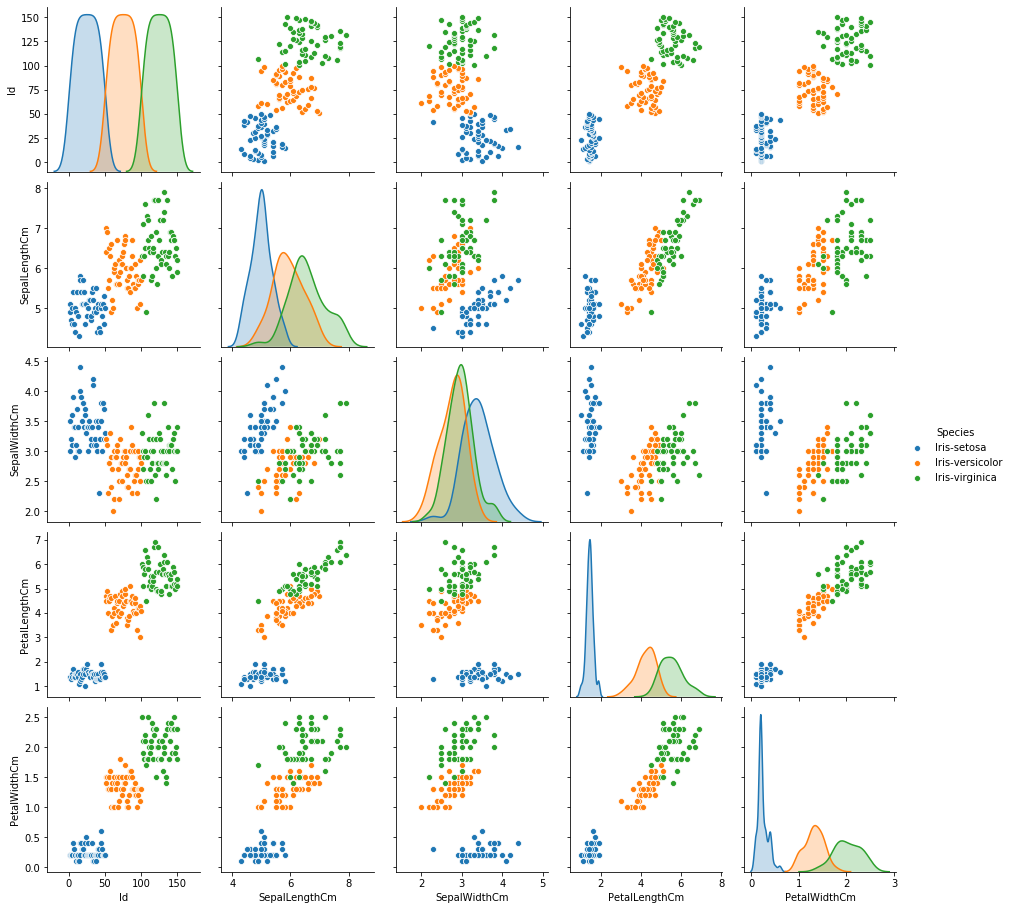

In [5]:
# Plotting pairwise relationships of the dataset.
plt.rcParams['figure.figsize'] = [9, 7]
sns.pairplot(iris.dropna(),hue="Species")

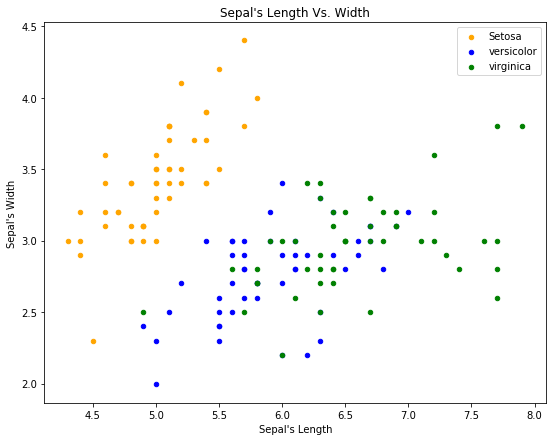

In [6]:
# Plot of Sepal's Length Vs. Width
fig = iris[iris.Species=='Iris-setosa'].plot(kind='scatter',x='SepalLengthCm',y='SepalWidthCm',color='orange', label='Setosa')
iris[iris.Species=='Iris-versicolor'].plot(kind='scatter',x='SepalLengthCm',y='SepalWidthCm',color='blue', label='versicolor',ax=fig)
iris[iris.Species=='Iris-virginica'].plot(kind='scatter',x='SepalLengthCm',y='SepalWidthCm',color='green', label='virginica', ax=fig)
fig.set_xlabel("Sepal's Length")
fig.set_ylabel("Sepal's Width")
fig.set_title("Sepal's Length Vs. Width")
fig=plt.gcf()
plt.show()

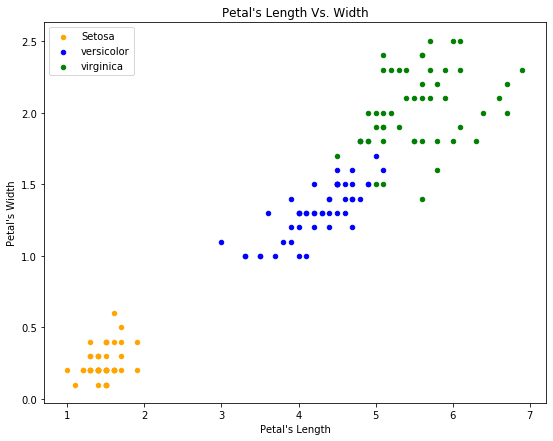

In [7]:
# Plot of Petal's Length Vs. Width
fig = iris[iris.Species=='Iris-setosa'].plot.scatter(x='PetalLengthCm',y='PetalWidthCm',color='orange', label='Setosa')
iris[iris.Species=='Iris-versicolor'].plot.scatter(x='PetalLengthCm',y='PetalWidthCm',color='blue', label='versicolor',ax=fig)
iris[iris.Species=='Iris-virginica'].plot.scatter(x='PetalLengthCm',y='PetalWidthCm',color='green', label='virginica', ax=fig)
fig.set_xlabel("Petal's Length")
fig.set_ylabel("Petal's Width")
fig.set_title("Petal's Length Vs. Width")
fig=plt.gcf()
plt.show()

## 3. Splitting the dataset into Training Set and Test Set

First we will store the independent and dependednt columns into X and y arrays.

In [8]:
X = iris.iloc[:, 1:5].values
y = iris.iloc[:, 5].values

Now, lets split the dataset into Training Set (70%) and Test Set (30%).

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

## 4. Training the Decision Tree Classifier on the dataset

In [10]:
# Fitting the classifier to the training set
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

## 5. Predicting the Test set results and calculating accuracy of the model

In [11]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Calculating the accuracy of our model
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, y_pred)
print('Accuracy of this model is {}%'.format(round(acc*100,2)))

Accuracy of this model is 97.78%


## 6. Visualizing the Decision Tree Classifier

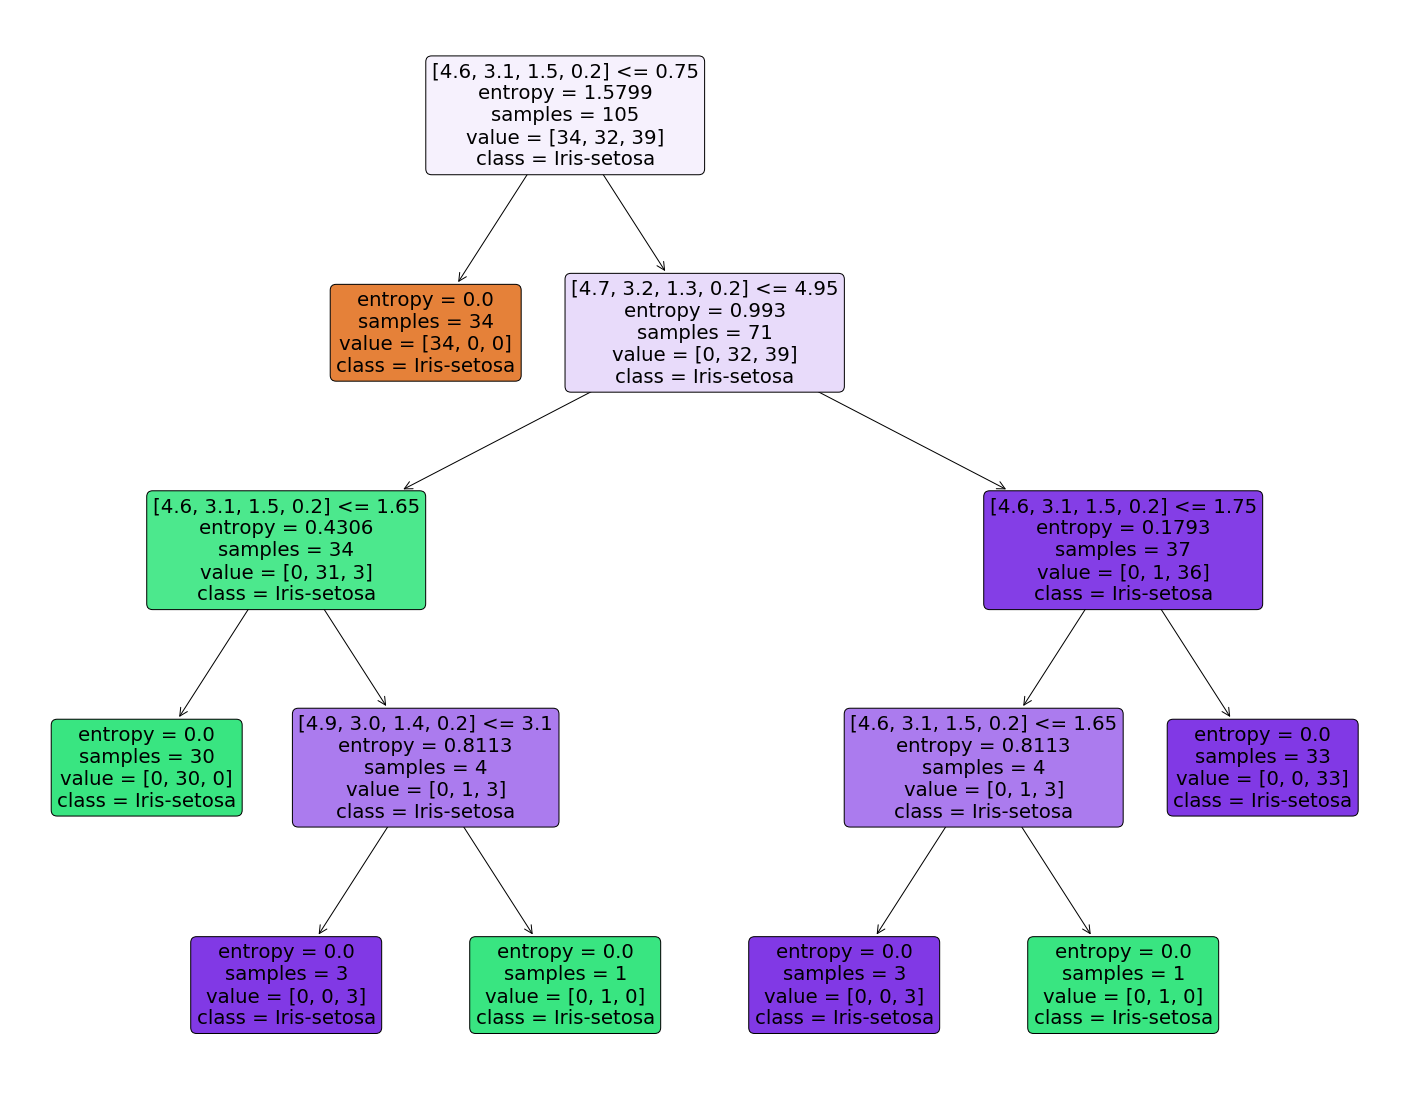

In [12]:
from sklearn.tree import plot_tree

f_name = X.tolist()
col_name = y.tolist()
plt.figure(figsize=(25,20))
tree_image = plot_tree(classifier, feature_names = f_name, class_names = col_name ,max_depth = 5, precision = 4, label = "all", 
                       filled = True, rounded = True)
plt.savefig('Tree_image')

## 7. Saving Model to disk and predicting the species

In [13]:
# Saving the model
import pickle
pickle.dump(classifier, open('model.pkl','wb'))

# Loading the model to compare the results
model = pickle.load(open('model.pkl','rb'))
print(model.predict([[5.5,2.3,4.0,1.3]]))

['Iris-versicolor']
